# Classification on Diabetes Dataset

## Summary

## Introduction

Diabetes is a prevalent chronic disease that affects millions worldwide, requiring early detection and proper management to reduce associated health risks. This project aims to develop a classification model to predict diabetes status based on various health indicators. By using data preprocessing strategies, we seek to improve the accuracy of diabetes detection using publicly available health datasets.


The dataset used in this project is sourced from the CDC Diabetes Health Indicators dataset, which contains various demographic and lifestyle-related features that may influence the likelihood of diabetes. The primary objective is to classify individuals into diabetic (1) or non-diabetic (0) categories using predictive modeling.


The project follows a structured approach to data preparation, exploration, and classification modeling.

Firstly, The dataset is obtained from an external source and loaded into R. Then, the raw dataset is inspected for completeness and correctness. Checking for missing values and unique values in each feature. Converting categorical variables (such as age, smoking status, and blood pressure) into factor types to facilitate analysis.

Moreover, the dataset is highly imbalanced, with more non-diabetic cases than diabetic ones. To address this, the ROSE (Random Over-Sampling Examples) technique is applied to generate synthetic data points and balance the dataset.

Various visualizations (bar plots, box plots, and scatter plots) are generated to explore the relationships between health indicators and diabetes status. Trends in factors such as BMI, high blood pressure, cholesterol levels, and physical activity are examined. The dataset is split into 75% training data and 25% testing data to build and evaluate machine learning models.


## Methods & Results

### (1) Load relevant libraries

In [9]:
options(repr.plot.width = 15, repr.plot.height = 10, warn = -1)

library(reticulate) 
library(tidyverse) 
library(tidymodels)
library(patchwork)
library(ROSE)

Loaded ROSE 0.0-4




### (2) Load data from the original source on the web

In [2]:
# do only once. Takes ages but it works. 
# This run the python script to extract file from uci in R

# py_run_file("/home/jovyan/work/data/raw/dataset_download.py")

In [10]:
# read out the raw csv
raw_diabetes_df <- read_csv("/home/jovyan/work/data/raw/cdc_diabetes_health_indicators.csv", show_col_types = FALSE)
head(raw_diabetes_df)

HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0
1,1,1,25,1,0,0,1,1,1,⋯,0,2,0,2,0,1,10,6,8,0


### (3) Wrangle and cleans the data from its original
#### Check for NA values 
- There are no NAs present in this dataset

In [11]:
# (1) 
# Check for NA values; there are no NAs present in this dataset

na_check <- raw_diabetes_df %>%
  summarise_all(~ sum(is.na(.)))
na_check_new <- as.data.frame(t(na_check))
colnames(na_check_new) <- c("NA_Count")
na_check_new

,NA_Count
,<int>
HighBP,0
HighChol,0
CholCheck,0
BMI,0
Smoker,0
Stroke,0
HeartDiseaseorAttack,0
PhysActivity,0
Fruits,0


#### Check the number of unique values in each variable + covert dbl to factor
- Some factors are still in quantitative form - also refer to metadata for what to convert

In [12]:
# (2) check the number of unique values in each variable + covert dbl to factor

# Some factor are still in double form - also refer to metadata for what to convert

class_counts <- raw_diabetes_df %>% summarise_all(n_distinct)
class_counts_new <- as.data.frame(t(class_counts))
colnames(class_counts_new) <- c("Class_Counts")
class_counts_new

,Class_Counts
,<int>
HighBP,2
HighChol,2
CholCheck,2
BMI,84
Smoker,2
Stroke,2
HeartDiseaseorAttack,2
PhysActivity,2
Fruits,2


- Many variables need to be converted to factor type, especially when applying ROSE
- The synthesis of balanced samples depends on the format of the data
- The following variables are not factorised:
    - `BMI`
    - `GenHlth`
    - `MentHlth`
    - `PhysHlth`

In [13]:
# These variables need to be converted to factor type, especially when applying ROSE
# Synthesis of balanced samples depends on the format of the data

# ----------------------------------------
# Converting the following columns to factor type

raw_diabetes_df <- raw_diabetes_df %>%
  mutate(across(!BMI, ~ factor(.)))

head(raw_diabetes_df, n = 5)

HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,40,1,0,0,0,0,1,⋯,0,5,18,15,1,0,9,4,3,0
0,0,0,25,1,0,0,1,0,0,⋯,1,3,0,0,0,0,7,6,1,0
1,1,1,28,0,0,0,0,1,0,⋯,1,5,30,30,1,0,9,4,8,0
1,0,1,27,0,0,0,1,1,1,⋯,0,2,0,0,0,0,11,3,6,0
1,1,1,24,0,0,0,1,1,1,⋯,0,2,3,0,0,0,11,5,4,0


#### Dataset balancing

- The dataset provided has about 86% of the people provided to not have diabetes.
- We seek to balance the dataset to mitigate bias towards the majority class, reduce the risk of overfitting, 

In [14]:
# (3) check how unbalance is the dataset + balance the data

# it's pretty unbalanced
target_result <- raw_diabetes_df %>%
  group_by(Diabetes_binary) %>%
  summarise(
    Count = n(),
    Proportion = n() / nrow(raw_diabetes_df)
  ) %>%
  ungroup()
print("Initial counts for diabetes")
target_result

# ----------------------------------------
# use ROSE to balance data by oversampling

set.seed(6)

balanced_raw_diabetes_df <- ROSE(Diabetes_binary ~ ., data = raw_diabetes_df, seed = 123)$data

balanced_target_result <- balanced_raw_diabetes_df %>%
  group_by(Diabetes_binary) %>%
  summarise(
    Count = n(),
    Proportion = n() / nrow(balanced_raw_diabetes_df)
  ) %>%
  ungroup()

balanced_target_result

[1] "Initial counts for diabetes"


Diabetes_binary,Count,Proportion
<fct>,<int>,<dbl>
0,218334,0.860667
1,35346,0.139333


Diabetes_binary,Count,Proportion
<fct>,<int>,<dbl>
0,126884,0.5001734
1,126796,0.4998266


#### Set balanced dataframe and split to training and testing
- The balanced dataset will be written into the `data/processed/` folder so that the steps above will not be mandatory to run the notebook each time.
- The balanced dataset will need to undergo refactoring again due to being freshly read from the `.csv` file.
- The dataset is split such that the proportion of `Diabetes_binary` is maintained for the training and testing sets.

In [15]:
# Write out balanced df into data/processed/ so we don't have to run all the step above each time
balanced_raw_diabetes_df %>% write_csv("/home/jovyan/work/data/processed/balanced_cdc_diabetes_health_indicators.csv")

In [17]:
# Then read it out again so we dont have to run the steps above
balanced_raw_diabetes_df <- read_csv("/home/jovyan/work/data/processed/balanced_cdc_diabetes_health_indicators.csv", show_col_types = FALSE)

# Have to refactor them again, since we are reading these from .csv again

balanced_raw_diabetes_df <- balanced_raw_diabetes_df %>%
  mutate(across(!BMI, ~ factor(.)))

In [18]:
# split the data into training and testing set 

set.seed(6)

diabetes_split <- initial_split(balanced_raw_diabetes_df, prop = 0.75, strata = Diabetes_binary)
diabetes_train <- training(diabetes_split)
diabetes_test <- testing(diabetes_split)
head(diabetes_train)

HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,⋯,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,1,34.92399,0,0,0,1,0,0,⋯,0,2,0,0,0,0,11,4,7,0
0,1,1,26.82572,0,0,0,1,1,1,⋯,1,5,0,30,1,0,13,6,4,0
0,1,1,25.91322,1,0,0,1,0,1,⋯,0,2,0,0,0,0,7,5,8,0
0,1,1,17.66171,1,0,0,1,0,1,⋯,0,3,0,0,0,1,8,6,7,0
1,1,1,29.68202,0,0,0,1,0,0,⋯,0,4,0,30,1,1,13,6,7,0
0,0,1,29.37924,0,0,0,1,0,0,⋯,0,3,0,0,0,1,1,6,8,0


In [19]:
class_counts_2 <- sapply(diabetes_train, function(x) length(unique(x)))
class_counts_2

HighBP             HighChol            CholCheck 
                   2                    2                    2 
                 BMI               Smoker               Stroke 
              190260                    2                    2 
HeartDiseaseorAttack         PhysActivity               Fruits 
                   2                    2                    2 
             Veggies    HvyAlcoholConsump        AnyHealthcare 
                   2                    2                    2 
         NoDocbcCost              GenHlth             MentHlth 
                   2                    5                   31 
            PhysHlth             DiffWalk                  Sex 
                  31                    2                    2 
                 Age            Education               Income 
                  13                    6                    8 
     Diabetes_binary 
                   2

### (4) Exploratory data analysis on training set

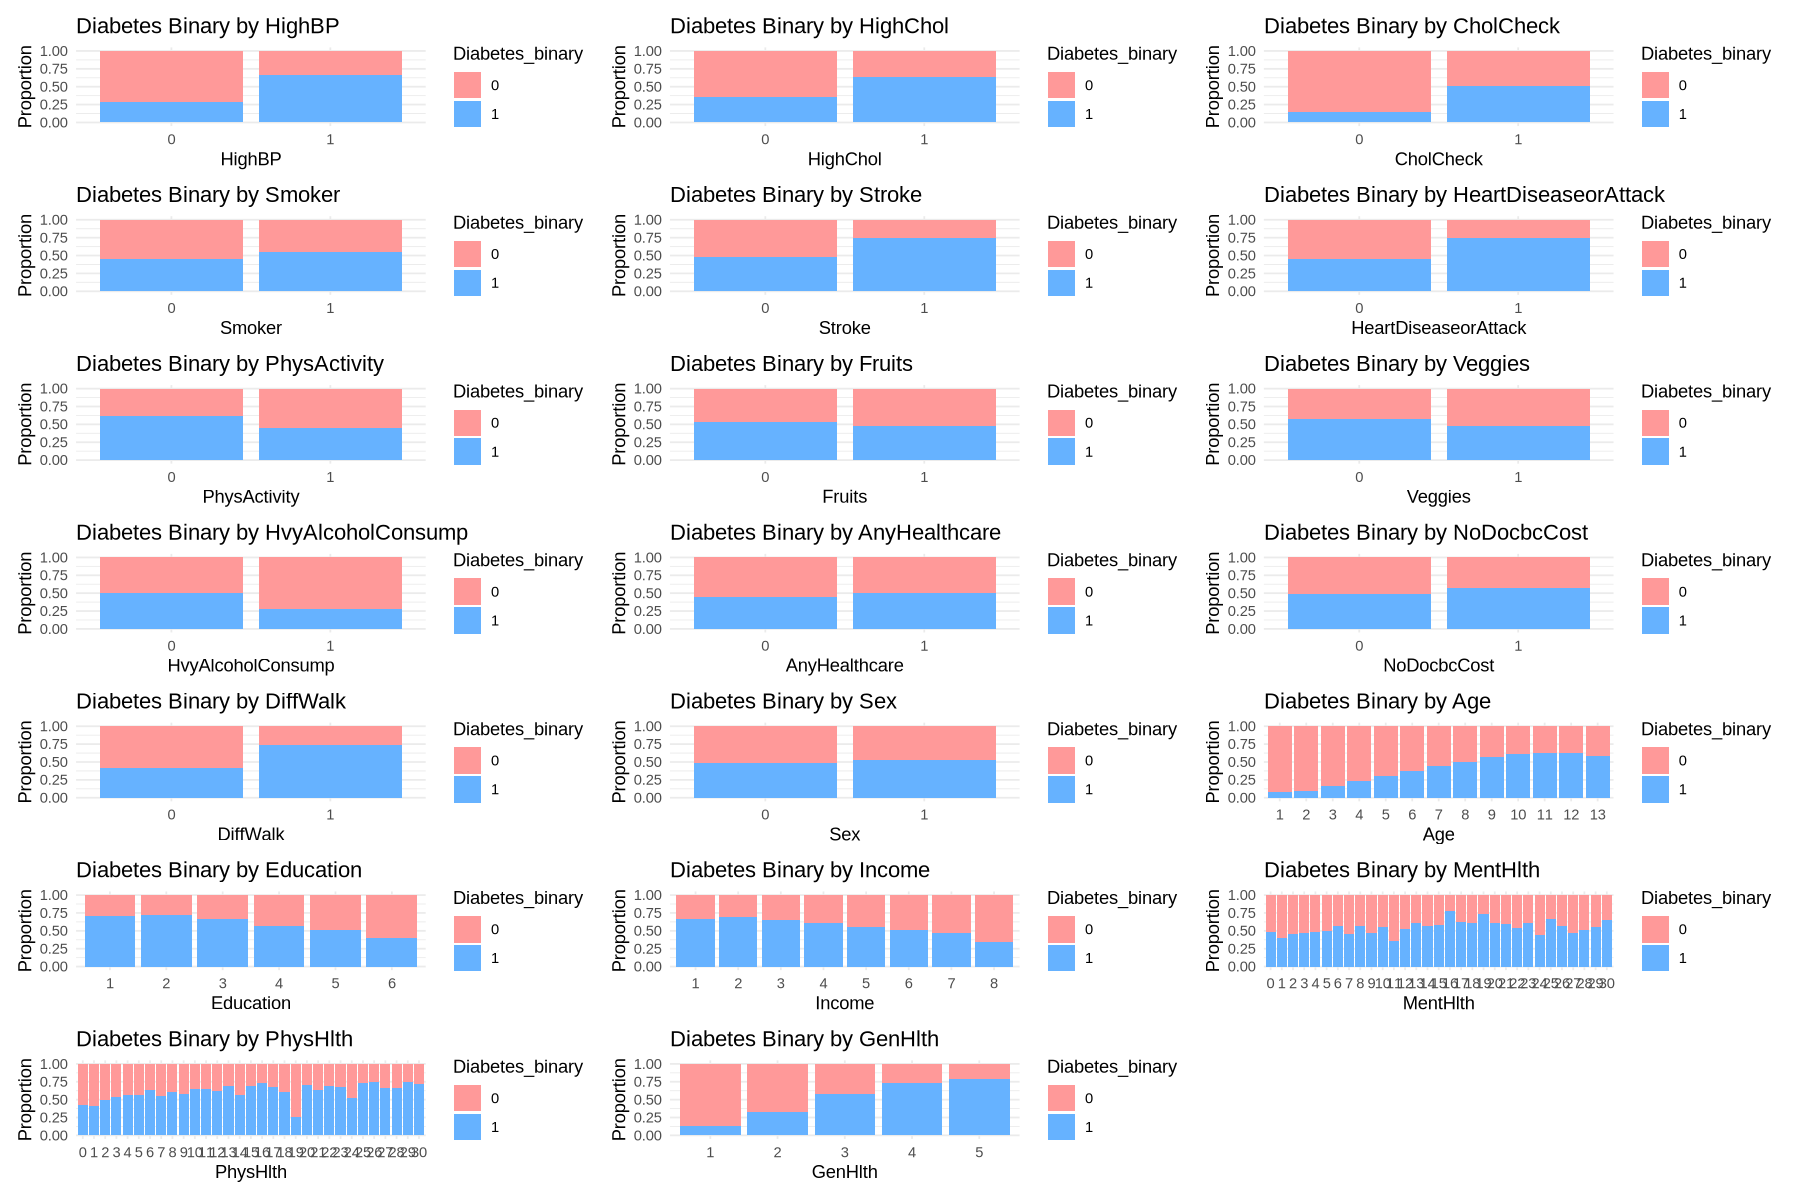

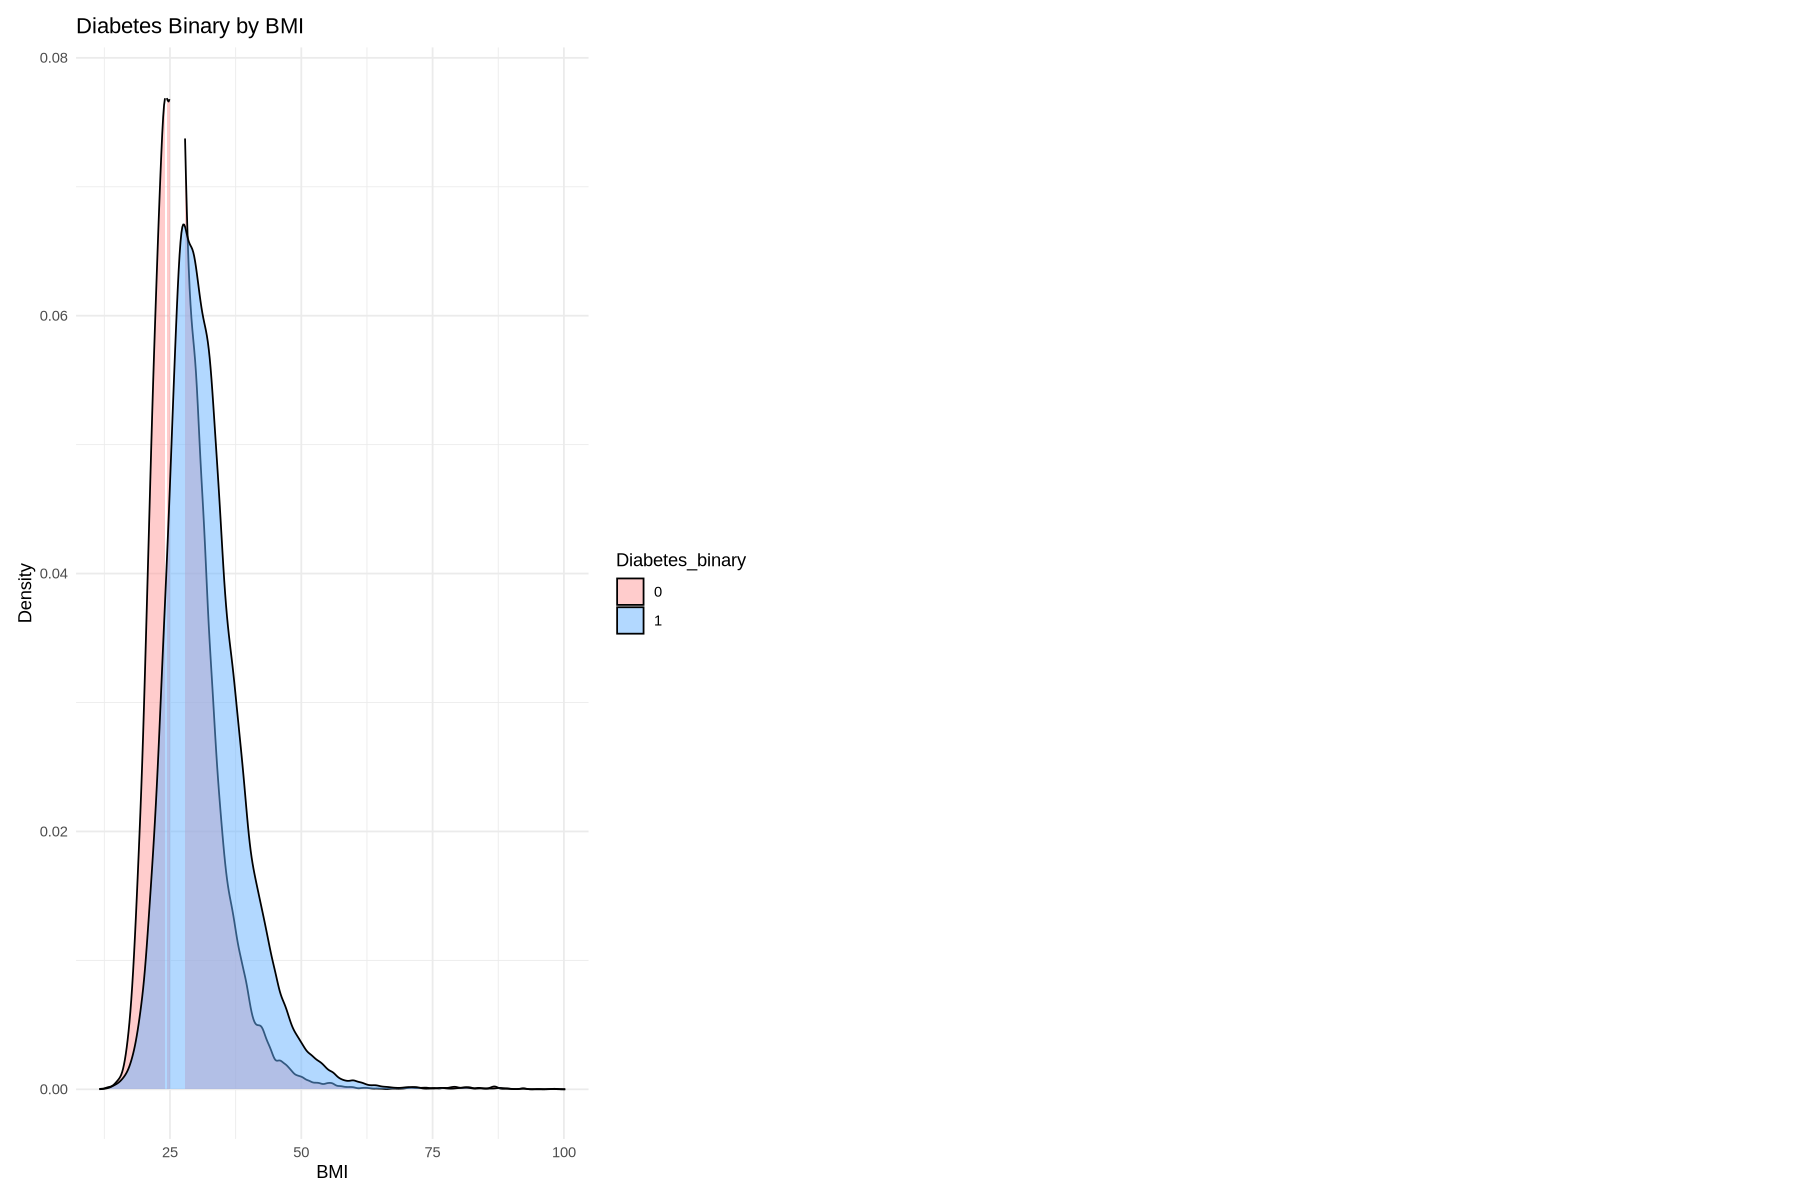

In [21]:
# binary
binary_vars <- c("HighBP", "HighChol", "CholCheck", "Smoker", "Stroke", 
                      "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies", 
                      "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", 
                      "DiffWalk", "Sex", "Age", "Education", "Income", "MentHlth", "PhysHlth", "GenHlth")

# not binary
nonbinary_var <- c("BMI")


# --------------------------------------------------
# inits
bar_plots <- list()
density_plots <- list()

# --------------------------------------------------
# Bar plots
for (var in binary_vars) {
  p <- ggplot(diabetes_train, aes(x = !!sym(var), fill = as.factor(Diabetes_binary))) +
    geom_bar(position = "fill") + 
    scale_fill_manual(values = c("#FF9999", "#66B2FF")) + 
    labs(title = paste("Diabetes Binary by", var),
         x = var,
         y = "Proportion",
         fill = "Diabetes_binary") +
    theme_minimal()
  bar_plots[[var]] <- p
}


# --------------------------------------------------
# Density plots

# same y limit
max_density <- 0
for (var in nonbinary_var) {
  density_data <- density(diabetes_train[[var]])
  max_density <- max(max_density, max(density_data$y))
}

buffer <- max_density * 0.70 
max_density_with_buffer <- max_density + buffer


for (var in nonbinary_var) {
  p <- ggplot(diabetes_train, aes(x = !!sym(var), fill = as.factor(Diabetes_binary))) +
    geom_density(alpha = 0.5) +
    scale_fill_manual(values = c("#FF9999", "#66B2FF")) + 
    labs(title = paste("Diabetes Binary by", var),
         x = var,
         y = "Density",
         fill = "Diabetes_binary") +
    ylim(0, max_density) +  
    theme_minimal()
  density_plots[[var]] <- p
}

# ----------------------------------------------------------------------------------------------
combined_bar_plots <- wrap_plots(bar_plots, ncol = 3)  
combined_density_plots <- wrap_plots(density_plots, ncol = 3) 

print(combined_bar_plots, width = 15, height = 20)  # Adjust width and height as needed
print(combined_density_plots, width = 15, height = 8)  # Adjust width and height as needed

### (4) Apply Classification - Logistic Regression
- Create logistic regression model, with `Diabetes_binary` as the prediction variable.
- All numeric predictor variables are normalised with `step_normalize()`.
- All nominal predictor variables have one-hot encoding applied through `step_dummy()`.

In [5]:
set.seed(6)

# prepare model

# recipe
my_rec <- recipe(Diabetes_binary ~ ., data = diabetes_train) %>% 
    step_normalize(all_numeric(), -all_outcomes()) %>%
    step_dummy(all_nominal(), -all_outcomes())  %>%
    step_zv(all_predictors())


# choose model, penalty + misture will be tune
glm_spec <- logistic_reg(penalty = tune(),
                         mixture = tune()) %>% 
  set_engine("glmnet")

# workflow
glm_wf <- workflow() %>% 
  add_recipe(my_rec) %>% 
  add_model(glm_spec)


# cross validation
set.seed(6)
train_fold <- diabetes_train %>% 
  vfold_cv(5, strata = Diabetes_binary)

In [6]:
# tuning setup

glmn_set <- parameters(penalty(range = c(-5,1)), mixture())

glmn_grid <- grid_regular(glmn_set, levels = c(7, 5))

mset <- metric_set(roc_auc,accuracy, recall)

ctrl <- control_grid(save_pred = TRUE, verbose = FALSE)

In [7]:
# actual running the tune 

glmn_tune <- 
  tune_grid(glm_wf,
            resamples = train_fold,
            grid = glmn_grid,
            metrics = mset,
            control = ctrl)

In [9]:
# create the final model

best_glmn <- select_best(glmn_tune, metric = "recall")

glm_wf_final <- glm_wf %>%
  finalize_workflow(best_glmn) %>%  
  fit(data = diabetes_train) 

In [10]:
# confusion matrix

glm_rs <-  glm_wf_final %>% 
  fit_resamples(
    resamples = train_fold,
    metrics = metric_set(roc_auc, accuracy, recall),
    control = control_resamples(save_pred = TRUE)
  )


collect_metrics(glm_rs)

glm_rs %>% 
  conf_mat_resampled()

.metric,.estimator,mean,n,std_err,.config
<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
accuracy,binary,0.5001734,5,2.627984e-06,Preprocessor1_Model1
recall,binary,1.0000000,5,0.000000e+00,Preprocessor1_Model1
roc_auc,binary,0.5000000,5,0.000000e+00,Preprocessor1_Model1


Prediction,Truth,Freq
<fct>,<fct>,<dbl>
0,0,19032.6
0,1,19019.4
1,0,0.0
1,1,0.0


### Metrics for classification:
- 

In [45]:
predictions <- predict(final_model, new_data = diabetes_test, type = "class") %>%
    bind_cols(diabetes_test)

accuracy_result <- predictions %>%
    accuracy(truth = Diabetes_binary, estimate = .pred_class)

precision_result <- predictions %>%
    precision(truth = Diabetes_binary, estimate = .pred_class)

recall_result <- predictions %>%
    recall(truth = Diabetes_binary, estimate = .pred_class)

f1_result <- predictions %>%
    f_meas(truth = Diabetes_binary, estimate = .pred_class)

metrics_table <- bind_rows(
  accuracy_result %>% mutate(.metric = "Accuracy"),
  precision_result %>% mutate(.metric = "Precision"),
  recall_result %>% mutate(.metric = "Recall"),
  f1_result %>% mutate(.metric = "F1 Score")
)
metrics_table

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
Accuracy,binary,0.5001734
Precision,binary,0.5001734
Recall,binary,1.0000000
F1 Score,binary,0.6668208


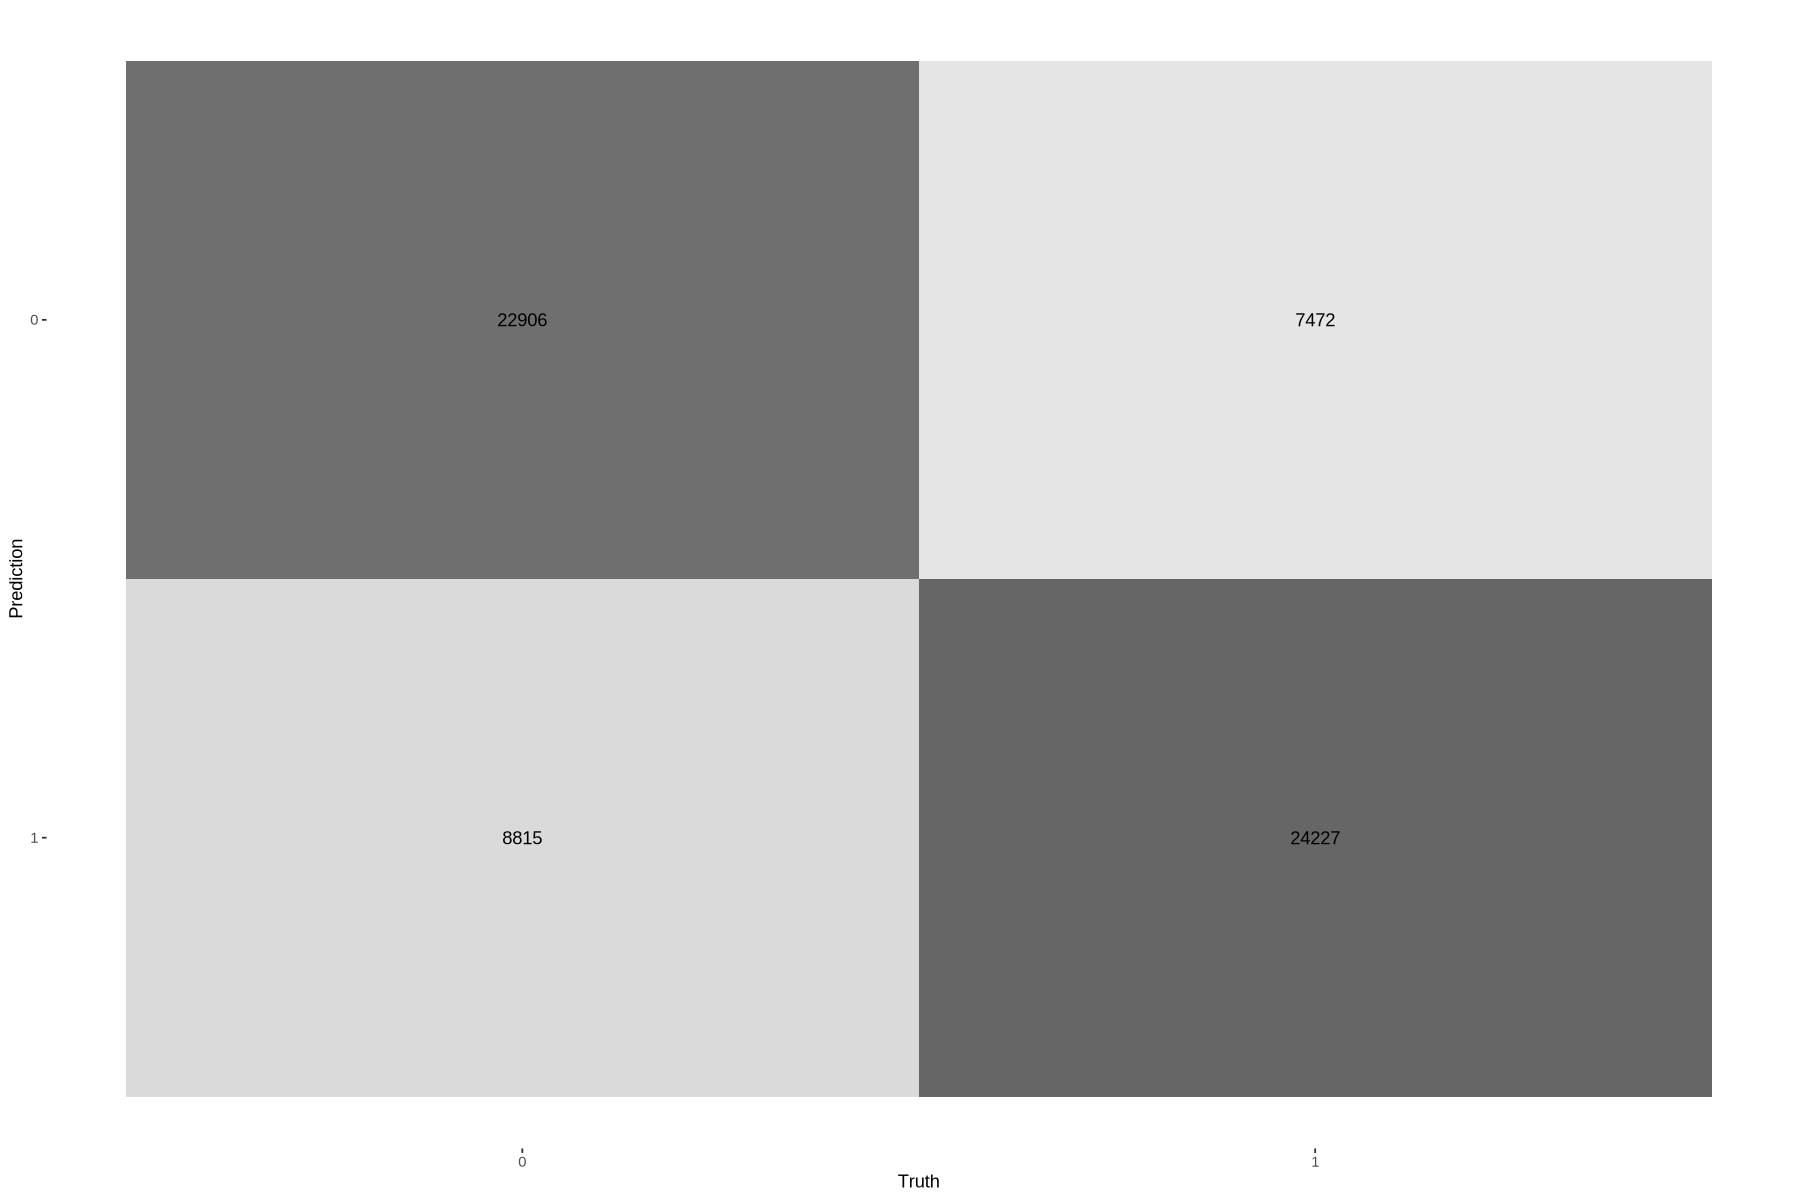

In [22]:
conf_matrix <- predictions %>% 
    conf_mat(truth = Diabetes_binary, estimate = .pred_class)
autoplot(conf_matrix, type = "heatmap")

### Visualisation 
- 

## Discussion


## References
- Centers for Disease Control and Prevention. (2023, September 25). CDC diabetes health indicators. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
- Centers for Disease Control and Prevention. (2017, August 11). CDC - 2015 BRFSS survey data and Documentation. https://www.cdc.gov/brfss/annual_data/annual_2015.html
- Burrows, N. R., Hora, I., Geiss, L. S., Gregg, E. W., & Albright, A. (2017, November 2). Incidence of End-Stage Renal Disease Attributed to Diabetes Among Persons with Diagnosed Diabetes — United States and Puerto Rico, 2000–2014. MMWR Morb Mortal Wkly Rep 2017. http://dx.doi.org/10.15585/mmwr.mm6643a2